# Boston and Seattle AirBNB Data Science Case Study

***This analysis follow the Cross-Industry Standard Process for Data Mining (CRISP-DM). This means it will follow the following steps interchangbly:***
* Business Understanding.
* Data Understanding.
* Data Preparation. 
* Modelling. 
* Evaluation.
* Deployment
---
Let's start with the first step, which is Understanding the main problem and asking the questions that mainly tackle the problem.

## Business Understanding
This dataset contains information and attributes of AirBNB listings. The listings are accompained with various features that can give us different insight about the AirBNB short-term rental business. However, we are mainly interested in the price to be our reponse variable. So that we will use the other features in relation with the price to answer the following questions:

1. What is the price average for the listed neighbourhoods indvidually ? Which neighbourhood has the maximum/minuimum price ?
1. Does the price fluctuates based on the month/ season of the year ? 
1. Do hosts with various/single listings tend to stabilize prices or change them frequently ?
1. What impact do the host attributes (superhost, acceptance rate, ..., etc) have on the price ?
1. What is the relationship between the property attributes and the price ?   

---

## Data Understanding 
In this section we will try to answer the questions using the data attributes and features. 
* What is the price average for the listed neighbourhoods indvidually ? Which neighbourhood has the maximum/minuimum price ?

**This question can be answered by grouping the dataframe by the neighbourhood and finding the average of the price for each neighbourhood.**

* Does the price fluctuates based on the month/ season of the year ? 

**The listing dates will be formatted as datetime and new features (month, year, week days) will be added in order to find out the relationship.**

* Do hosts with various/single listings tend to stabilize prices or change them frequently ?

**we will need to access the 'host_listings_count' column and the price column to answer this question.**

* What impact do the host attributes (superhost, acceptance rate, ..., etc) have on the price ?

**we will compare some numerical columns that evaluates the host with the price column to see if they have an effect on the price. These columns are: 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost','review_scores_rating'.**

* What is the relationship between the property attributes and the price ?  

**we will compare some numerical columns that evaluates the property with the price column to see if they have an effect on the price. These columns are: 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities'.**
  
---
## Data Preparation 

Firstly, the main files of interest are the listings and calendars csvs. The dataset will go through the following process (new features can be created at any stage): 

1. Check for columns of interest according to the above mentioned questions and drop the other columns. 
1. Confirm or change the data type of each column as needed. 
1. Check for the missing values and deal with them based on each case indivdiually. (imputing/removing or creating new features out of them.)
1. Check for duplicated home IDs. 
1. Adjust the dataset to answer each question individually using visualization and statistical analysis. 
1. Merge datasets and adapt categorical/string columns for data modelling (machine learning prediction of the price). 


In [1]:
# Import nessecary packages and libararies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import sklearn as sk
from    VizTools import VizTool
from HelperFunc import HelperFunction
%matplotlib inline
# Intialize instances from needed classes
# Intitialize an instance from the visualization class 
visualize = VizTool ()
# Intitialize an instance from the HelperFunction class 
helper = HelperFunction()


### Import Dataset

In [2]:
# Load Boston Datasets
boston_listing = pd.read_csv('BostonAirBNB/BostonListings.csv')
boston_calendar = pd.read_csv('BostonAirBNB/BostonCalendar.csv')

#### Step 1: Check for columns of interest according to the above mentioned questions and drop the other columns

In [3]:
unused_features = ['listing_url','scrape_id', 'name','summary' 
,'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes'
,'transit','access', 'interaction', 'house_rules','thumbnail_url', 'medium_url'
,'picture_url','xl_picture_url', 'host_id','host_url','host_name'
,'host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood'
,'host_listings_count','host_verifications','host_has_profile_pic','host_identity_verified'
,'street','neighbourhood','neighbourhood_group_cleansed','city','state','zipcode','market'
,'smart_location','country_code','country','latitude','longitude','is_location_exact'
,'square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee'
,'guests_included','extra_people','minimum_nights','maximum_nights', 'calendar_updated'
,'has_availability','availability_30','availability_60','availability_90'
,'calendar_last_scraped','number_of_reviews','first_review','last_review','review_scores_accuracy'
,'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication'
,'review_scores_location','review_scores_value','requires_license', 'license','jurisdiction_names'
,'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification'
,'calculated_host_listings_count'] 

In [4]:
listing_filtered = helper.desired_features(boston_listing, unused_features)
listing_filtered.head()

id last_scraped  host_since  host_response_time host_response_rate  \
0  12147973   2016-09-07  2015-04-15                 NaN                NaN   
1   3075044   2016-09-07  2012-06-07      within an hour               100%   
2      6976   2016-09-07  2009-05-11  within a few hours               100%   
3   1436513   2016-09-07  2013-04-21  within a few hours               100%   
4   7651065   2016-09-07  2014-05-11      within an hour               100%   

  host_acceptance_rate host_is_superhost  host_total_listings_count  \
0                  NaN                 f                          1   
1                 100%                 f                          1   
2                  88%                 t                          1   
3                  50%                 f                          1   
4                 100%                 t                          1   

  neighbourhood_cleansed property_type  ... accommodates  bathrooms  bedrooms  \
0             Roslindale         House  ...            4        1.5       2.0   
1             Roslindale     Apartment  ...            2        1.0       1.0   
2             Roslindale     Apartment  ...            2        1.0       1.0   
3             Roslindale         House  ...            4        1.0       1.0   
4             Roslindale         House  ...            2        1.5       1.0   

   beds  bed_type                                          amenities    price  \
0   3.0  Real Bed  {TV,"Wireless Internet",Kitchen,"Free Parking ...  $250.00   
1   1.0  Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   $65.00   
2   1.0  Real Bed  {TV,"Cable TV","Wireless Internet","Air Condit...   $65.00   
3   2.0  Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   $75.00   
4   2.0  Real Bed  {Internet,"Wireless Internet","Air Conditionin...   $79.00   

  availability_365  review_scores_rating  reviews_per_month  
0                0                   NaN                NaN  
1              359                  94.0               1.30  
2              319                  98.0               0.47  
3               98                 100.0               1.00  
4              334                  99.0               2.25  

[5 rows x 21 columns]

Now with the calendar dataset

In [5]:
# Remove all the unavailable listings
calendar_filtered = boston_calendar[boston_calendar.available == 't'].drop(columns = ['available'])

#### Step 2: Confirm or change the data type of each column as needed.

Let's start with the calendar data. 

In [6]:
# check data types
boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
# Change date column to datetime format
calendar_filtered.date = pd.to_datetime(calendar_filtered.date)

In [8]:
# Create new features and drop date column
calendar_filtered['year'] = pd.DatetimeIndex(calendar_filtered['date']).year
calendar_filtered['month'] = pd.DatetimeIndex(calendar_filtered['date']).month
calendar_filtered['weekday'] = pd.DatetimeIndex(calendar_filtered['date']).weekday
calendar_filtered['weekday'] = calendar_filtered.weekday.apply(lambda z : helper.weekday(z))
calendar_filtered = calendar_filtered.drop (columns = ['date'])

In [9]:
# Fix the price data type from string to float
calendar_filtered.price = calendar_filtered.price.apply(lambda x: int(helper.fix_price(x)))


In [10]:
# Check again for the data types after adjustments
calendar_filtered.dtypes

listing_id     int64
price          int64
year           int64
month          int64
weekday       object
dtype: object

Let's repeat the same process but with the listing dataset. 

In [11]:
listing_filtered.dtypes

id                             int64
last_scraped                  object
host_since                    object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost             object
host_total_listings_count      int64
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                         object
availability_365               int64
review_scores_rating         float64
reviews_per_month            float64
dtype: object

In [12]:
listing_filtered.head()

id last_scraped  host_since  host_response_time host_response_rate  \
0  12147973   2016-09-07  2015-04-15                 NaN                NaN   
1   3075044   2016-09-07  2012-06-07      within an hour               100%   
2      6976   2016-09-07  2009-05-11  within a few hours               100%   
3   1436513   2016-09-07  2013-04-21  within a few hours               100%   
4   7651065   2016-09-07  2014-05-11      within an hour               100%   

  host_acceptance_rate host_is_superhost  host_total_listings_count  \
0                  NaN                 f                          1   
1                 100%                 f                          1   
2                  88%                 t                          1   
3                  50%                 f                          1   
4                 100%                 t                          1   

  neighbourhood_cleansed property_type  ... accommodates  bathrooms  bedrooms  \
0             Roslindale         House  ...            4        1.5       2.0   
1             Roslindale     Apartment  ...            2        1.0       1.0   
2             Roslindale     Apartment  ...            2        1.0       1.0   
3             Roslindale         House  ...            4        1.0       1.0   
4             Roslindale         House  ...            2        1.5       1.0   

   beds  bed_type                                          amenities    price  \
0   3.0  Real Bed  {TV,"Wireless Internet",Kitchen,"Free Parking ...  $250.00   
1   1.0  Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   $65.00   
2   1.0  Real Bed  {TV,"Cable TV","Wireless Internet","Air Condit...   $65.00   
3   2.0  Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   $75.00   
4   2.0  Real Bed  {Internet,"Wireless Internet","Air Conditionin...   $79.00   

  availability_365  review_scores_rating  reviews_per_month  
0                0                   NaN                NaN  
1              359                  94.0               1.30  
2              319                  98.0               0.47  
3               98                 100.0               1.00  
4              334                  99.0               2.25  

[5 rows x 21 columns]

We see that these columns should be changed : 
- Price : string to float 
- host_response_time : string to categorical
- host_response_rate : string to float
- host_acceptance_rate: string to float 
- host_is_superhost: string to boolean
- room_type: string to categorical
- bed_type: string to categorical
- neighbourhood_cleansed:  string to categorical
- amenities: change each datapoint to list of strings, and return the length of list. (to int)


Now lets check the unique values for string to categorical columns:

In [13]:
# Host response time
print(listing_filtered.host_response_time.unique())

[nan 'within an hour' 'within a few hours' 'within a day'
 'a few days or more']


In [14]:
# Room type
print(listing_filtered.room_type.unique())

['Entire home/apt' 'Private room' 'Shared room']


In [15]:
# Bed type
print(listing_filtered.bed_type.unique())

['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


In [16]:
print(listing_filtered.neighbourhood_cleansed.unique())

['Roslindale' 'Jamaica Plain' 'Mission Hill' 'Longwood Medical Area'
 'Bay Village' 'Leather District' 'Chinatown' 'North End' 'Roxbury'
 'South End' 'Back Bay' 'East Boston' 'Charlestown' 'West End'
 'Beacon Hill' 'Downtown' 'Fenway' 'Brighton' 'West Roxbury' 'Hyde Park'
 'Mattapan' 'Dorchester' 'South Boston Waterfront' 'South Boston'
 'Allston']


In [17]:
# Transform all categorical data types to category
listing_filtered = listing_filtered.astype({'host_response_time' : 'category'
, 'bed_type' : 'category'
, 'neighbourhood_cleansed' : 'category' 
,'room_type':'category'}, inplace = True);
listing_filtered.dtypes

id                              int64
last_scraped                   object
host_since                     object
host_response_time           category
host_response_rate             object
host_acceptance_rate           object
host_is_superhost              object
host_total_listings_count       int64
neighbourhood_cleansed       category
property_type                  object
room_type                    category
accommodates                    int64
bathrooms                     float64
bedrooms                      float64
beds                          float64
bed_type                     category
amenities                      object
price                          object
availability_365                int64
review_scores_rating          float64
reviews_per_month             float64
dtype: object

Now lets adjust the boolean columns to be False and True instead of 'f' and 't':

In [18]:
listing_filtered.host_is_superhost = listing_filtered.host_is_superhost.apply(lambda x : helper.to_boolean(x))

Now lets change the numerical columns from string to int or float: 

In [19]:
listing_filtered.host_acceptance_rate = listing_filtered.host_acceptance_rate.apply(lambda x : helper.fix_rate(x))
listing_filtered.host_response_rate = listing_filtered.host_response_rate.apply(lambda x : helper.fix_rate(x))
listing_filtered.price = listing_filtered.price.apply(lambda x : helper.fix_price(x))


In [20]:
listing_filtered = listing_filtered.astype({'host_acceptance_rate' : 'float'
, 'host_response_rate' : 'float'
, 'price' : 'float'}, inplace = True);

Finally, we change the last column amenities from string to numeric.

In [21]:
listing_filtered.amenities = listing_filtered.amenities.apply(lambda x: helper.amenities_as_value(x))

In [22]:
listing_filtered.dtypes

id                              int64
last_scraped                   object
host_since                     object
host_response_time           category
host_response_rate            float64
host_acceptance_rate          float64
host_is_superhost               int64
host_total_listings_count       int64
neighbourhood_cleansed       category
property_type                  object
room_type                    category
accommodates                    int64
bathrooms                     float64
bedrooms                      float64
beds                          float64
bed_type                     category
amenities                       int64
price                         float64
availability_365                int64
review_scores_rating          float64
reviews_per_month             float64
dtype: object

***Merge both dataset to form one complete dataset for the comparison purposes.***

In [23]:
calendar_filtered.rename(columns = {'listing_id' : 'id'}, inplace = True)


In [24]:
pd.merge (calendar_filtered, listing_filtered.drop(columns = ['price']), on = 'id')

id  price  year  month    weekday last_scraped  host_since  \
0        3075044     65  2017      8    Tuesday   2016-09-07  2012-06-07   
1        3075044     65  2017      8     Monday   2016-09-07  2012-06-07   
2        3075044     65  2017      8     Sunday   2016-09-07  2012-06-07   
3        3075044     75  2017      8   Saturday   2016-09-07  2012-06-07   
4        3075044     75  2017      8     Friday   2016-09-07  2012-06-07   
5        3075044     65  2017      8   Thursday   2016-09-07  2012-06-07   
6        3075044     65  2017      8  Wednesday   2016-09-07  2012-06-07   
7        3075044     65  2017      8    Tuesday   2016-09-07  2012-06-07   
8        3075044     65  2017      8     Monday   2016-09-07  2012-06-07   
9        3075044     65  2017      8     Sunday   2016-09-07  2012-06-07   
10       3075044     75  2017      8   Saturday   2016-09-07  2012-06-07   
11       3075044     75  2017      8     Friday   2016-09-07  2012-06-07   
12       3075044     65  2017      8   Thursday   2016-09-07  2012-06-07   
13       3075044     65  2017      8  Wednesday   2016-09-07  2012-06-07   
14       3075044     65  2017      8    Tuesday   2016-09-07  2012-06-07   
15       3075044     65  2017      8     Monday   2016-09-07  2012-06-07   
16       3075044     65  2017      8     Sunday   2016-09-07  2012-06-07   
17       3075044     75  2017      8   Saturday   2016-09-07  2012-06-07   
18       3075044     75  2017      8     Friday   2016-09-07  2012-06-07   
19       3075044     65  2017      8   Thursday   2016-09-07  2012-06-07   
20       3075044     65  2017      8  Wednesday   2016-09-07  2012-06-07   
21       3075044     65  2017      8    Tuesday   2016-09-07  2012-06-07   
22       3075044     65  2017      7     Monday   2016-09-07  2012-06-07   
23       3075044     65  2017      7     Sunday   2016-09-07  2012-06-07   
24       3075044     75  2017      7   Saturday   2016-09-07  2012-06-07   
25       3075044     75  2017      7     Friday   2016-09-07  2012-06-07   
26       3075044     65  2017      7   Thursday   2016-09-07  2012-06-07   
27       3075044     65  2017      7  Wednesday   2016-09-07  2012-06-07   
28       3075044     65  2017      7    Tuesday   2016-09-07  2012-06-07   
29       3075044     65  2017      7     Monday   2016-09-07  2012-06-07   
...          ...    ...   ...    ...        ...          ...         ...   
643007  14504422     65  2016     10   Thursday   2016-09-07  2015-08-20   
643008  14504422     65  2016     10  Wednesday   2016-09-07  2015-08-20   
643009  14504422     65  2016     10    Tuesday   2016-09-07  2015-08-20   
643010  14504422     65  2016     10     Monday   2016-09-07  2015-08-20   
643011  14504422     65  2016     10     Sunday   2016-09-07  2015-08-20   
643012  14504422     65  2016     10   Saturday   2016-09-07  2015-08-20   
643013  14504422     65  2016     10     Friday   2016-09-07  2015-08-20   
643014  14504422     65  2016     10   Thursday   2016-09-07  2015-08-20   
643015  14504422     65  2016     10  Wednesday   2016-09-07  2015-08-20   
643016  14504422     65  2016     10     Sunday   2016-09-07  2015-08-20   
643017  14504422     65  2016     10   Saturday   2016-09-07  2015-08-20   
643018  14504422     65  2016     10     Friday   2016-09-07  2015-08-20   
643019  14504422     65  2016     10   Thursday   2016-09-07  2015-08-20   
643020  14504422     65  2016     10  Wednesday   2016-09-07  2015-08-20   
643021  14504422     65  2016     10    Tuesday   2016-09-07  2015-08-20   
643022  14504422     65  2016     10     Monday   2016-09-07  2015-08-20   
643023  14504422     65  2016     10     Sunday   2016-09-07  2015-08-20   
643024  14504422     62  2016     10   Saturday   2016-09-07  2015-08-20   
643025  14504422     62  2016      9     Friday   2016-09-07  2015-08-20   
643026  14504422     62  2016      9   Thursday   2016-09-07  2015-08-20   
643027  14504422     65  2016      9     Sunday   2016-09-07  

In [25]:
boston_dataset = pd.merge (calendar_filtered, listing_filtered.drop(columns = ['price']), on = 'id')

#### Step 3: Check for the missing values and deal with them based on each case indivdiually. (imputing/removing or creating new features out of them.)
Let's start with the calendar data. 

In [26]:
# Check the missing values for the calendar data
calendar_filtered.isna().sum()

id         0
price      0
year       0
month      0
weekday    0
dtype: int64

It looks clear that there is no missing values in the calendar dataset. Now let's analyze the missing values for the listing dataset.

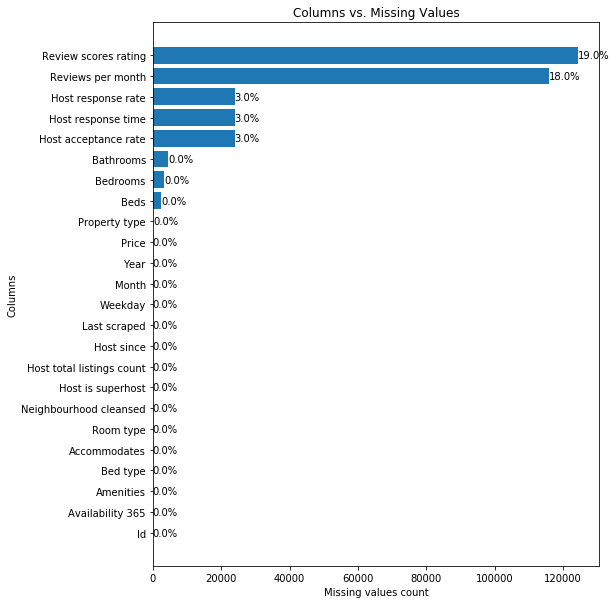

In [27]:
Y = boston_dataset.isna().sum().sort_values().reset_index()[0]
X = boston_dataset.isna().sum().sort_values().reset_index()['index']
X = X.apply (lambda x : x.replace('_', ' '))
X = X.apply(lambda x : x.capitalize())
# plt.figure(figsize = [5,10]) 
# plt.barh(X,Y);
visualize.Plot_barhProp (X, Y,boston_dataset.shape[0],list(Y),'Missing values count','Columns','Columns vs. Missing Values',fig_size = [8,10],Rotation = None)

The figure above shows the missing values count and their percentages for each column relative to the total number of listings. The values in this dataset are unique for each listing. Therefore, they can not be imputed. However, we might get a better intuition of the listings with missing values, if we look at the distribution of the key features in our analysis. We will assess the days of availiability, the host total listings, and the price range. 

**Feature one: How many days was the listing available for listings with missing values ?**

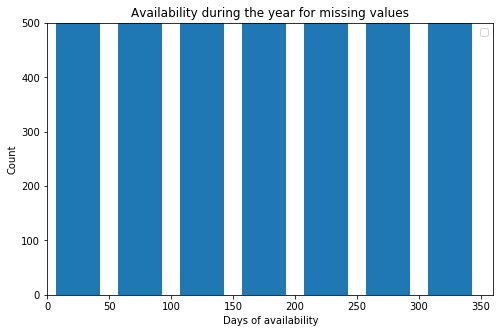

In [28]:
availability_missing = boston_dataset [boston_dataset.isnull().any(axis=1)].availability_365
visualize.Plot_Hist (availability_missing,axis = [0, 360, 0, 500],title = 'Availability during the year for missing values', xlabel = 'Days of availability', ylabel = 'Count', legend = None,minimum = 0, maximum = 365, step = 50, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Two: How many listings does the host have for listings with missing values ?**

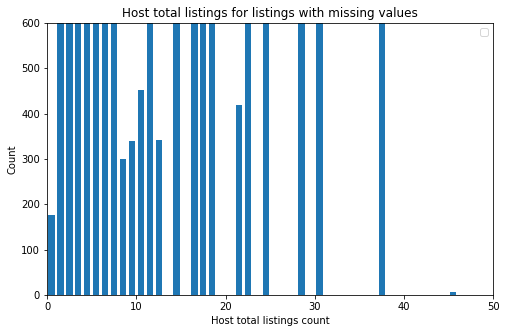

In [29]:
host_listings = boston_dataset [boston_dataset.isnull().any(axis=1)].host_total_listings_count
visualize.Plot_Hist (host_listings,axis = [0, 50, 0, 600],title = 'Host total listings for listings with missing values',
 xlabel = 'Host total listings count', ylabel = 'Count', legend = None,minimum = host_listings.min(),
  maximum = host_listings.max(), step = 1, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Three: What are the price ranges for listings with missing values?**

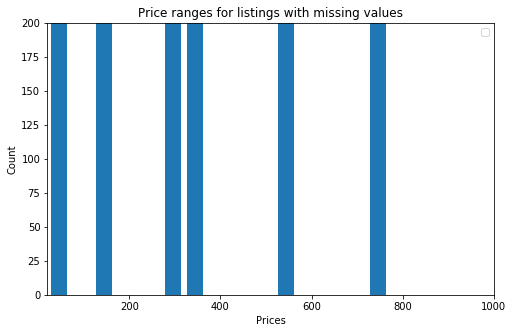

In [30]:
price_missing = boston_dataset [boston_dataset.isnull().any(axis=1)].price
price_max = price_missing.max()
price_min = price_missing.min()
visualize.Plot_Hist (host_listings,axis = [price_min, 1000, 0, 200],title = 'Price ranges for listings with missing values',
 xlabel = 'Prices', ylabel = 'Count', legend = None,minimum = price_min,
  maximum = price_max, step = 50, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Four: How many years of host experience, does the owner of the listing have?**
- This will require reformulating the last_scraped and host_since columns to be date time format. They will form a new column called years_as_host, and they will be dropeed afterwards, except the new formed feature.

In [31]:
boston_dataset.last_scraped = pd.to_datetime(boston_dataset.last_scraped)
year_scraped = pd.DatetimeIndex(boston_dataset.last_scraped).year
boston_dataset.host_since = pd.to_datetime(boston_dataset.host_since)
year_host = pd.DatetimeIndex(boston_dataset.host_since).year
boston_dataset['years_as_host'] = year_scraped - year_host
boston_dataset = boston_dataset.drop(columns = ['last_scraped','host_since'])


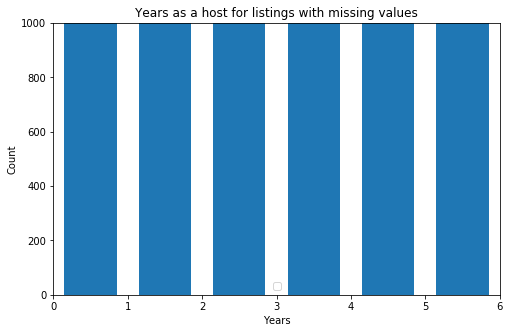

In [32]:
# Now lets visualize the years as a host column for missing values
years_host_miss = boston_dataset[boston_dataset.isnull().any(axis = 1)].years_as_host
visualize.Plot_Hist (years_host_miss,axis = [0, 6, 0, 1000],title = 'Years as a host for listings with missing values',
 xlabel = 'Years', ylabel = 'Count', legend = None,minimum = years_host_miss.min(),
  maximum = years_host_miss.max(), step = 1, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

***From the above shown graphs we can conclude that some of the missing value listings are for new hosts with 0 or less than 10 days availability over one whole year. However, there are higher percentage for other groups who can be experienced hosts with several listings. Therefore, the missing values will be dealt with on two stages. Firstly, we will remove missing values for only listings with less than 10 days availability, with host registered less than a year, and host has only one listing. However, the numeric columns with missing data higher than 10% will be dropped from the dataset, and the ones lower than 10% will be imputed in the data visualization phase, as we don't want to lose variability in the other columns. However, they will be visualized solely without missing values in comparison to the price. Yet, in the data modelling part, where machine learning will be used, the missing data rows will be all removed, as we want to see the effect of all features together on the price prediction without impurities.***   

For data visualization: remove missing values for group one as mentioned above, and drop columns with missing values:

In [33]:
availability_condition = boston_dataset.availability_365 <= 10
listing_condition  = boston_dataset.host_total_listings_count < 2
host_condition = boston_dataset.years_as_host <=1

listing_no_miss = boston_dataset[availability_condition & listing_condition & host_condition].dropna()
listing_no_group1 = boston_dataset[~((availability_condition) & (listing_condition) & (host_condition))]
listing_adjusted = pd.concat ([listing_no_miss,listing_no_group1]).sort_index()
listing_adjusted.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 642983 entries, 0 to 643036
Data columns (total 23 columns):
id                           642983 non-null int64
price                        642983 non-null int64
year                         642983 non-null int64
month                        642983 non-null int64
weekday                      642983 non-null object
host_response_time           619112 non-null category
host_response_rate           619112 non-null float64
host_acceptance_rate         619112 non-null float64
host_is_superhost            642983 non-null int64
host_total_listings_count    642983 non-null int64
neighbourhood_cleansed       642983 non-null category
property_type                642835 non-null object
room_type                    642983 non-null category
accommodates                 642983 non-null int64
bathrooms                    638529 non-null float64
bedrooms                     639715 non-null float64
beds                         640588 non-null float64
b

drop the columns with lower than 10% missing values

In [34]:
imputed_columns_condition = (boston_dataset.isna().mean() < 0.1) & (boston_dataset.isna().mean() > 0)
imputed_columns_series = imputed_columns_condition.reset_index()
imputed_columns = list(imputed_columns_series[imputed_columns_series[0] == True]['index'].values)

In [35]:
listing_adjusted = listing_adjusted.dropna(subset = imputed_columns, how = 'any',axis = 0 )
listing_adjusted.isna().sum()

id                                0
price                             0
year                              0
month                             0
weekday                           0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_total_listings_count         0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
availability_365                  0
review_scores_rating         109277
reviews_per_month            102000
years_as_host                     0
dtype: int64

In [36]:
listing_no_missing = listing_adjusted.dropna(axis='columns')


In [37]:
listing_no_missing.head()

id  price  year  month   weekday host_response_time  \
0  3075044     65  2017      8   Tuesday     within an hour   
1  3075044     65  2017      8    Monday     within an hour   
2  3075044     65  2017      8    Sunday     within an hour   
3  3075044     75  2017      8  Saturday     within an hour   
4  3075044     75  2017      8    Friday     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0               100.0                 100.0                  0   
1               100.0                 100.0                  0   
2               100.0                 100.0                  0   
3               100.0                 100.0                  0   
4               100.0                 100.0                  0   

   host_total_listings_count  ... property_type     room_type accommodates  \
0                          1  ...     Apartment  Private room            2   
1                          1  ...     Apartment  Private room            2   
2                          1  ...     Apartment  Private room            2   
3                          1  ...     Apartment  Private room            2   
4                          1  ...     Apartment  Private room            2   

   bathrooms  bedrooms  beds  bed_type amenities  availability_365  \
0        1.0       1.0   1.0  Real Bed        21               359   
1        1.0       1.0   1.0  Real Bed        21               359   
2        1.0       1.0   1.0  Real Bed        21               359   
3        1.0       1.0   1.0  Real Bed        21               359   
4        1.0       1.0   1.0  Real Bed        21               359   

   years_as_host  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 21 columns]

In [38]:
listing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610593 entries, 0 to 643036
Data columns (total 21 columns):
id                           610593 non-null int64
price                        610593 non-null int64
year                         610593 non-null int64
month                        610593 non-null int64
weekday                      610593 non-null object
host_response_time           610593 non-null category
host_response_rate           610593 non-null float64
host_acceptance_rate         610593 non-null float64
host_is_superhost            610593 non-null int64
host_total_listings_count    610593 non-null int64
neighbourhood_cleansed       610593 non-null category
property_type                610593 non-null object
room_type                    610593 non-null category
accommodates                 610593 non-null int64
bathrooms                    610593 non-null float64
bedrooms                     610593 non-null float64
beds                         610593 non-null float64
b

#### Step 4: Check for duplicated home IDs.


Calendar dataset :

In [39]:
# Check for number of duplicated home IDs in the calendar dataset
boston_dataset.id.duplicated().sum()

640131

***It is obvious that a lot of the home IDs are duplicated in the dataset. This occured due to the multiple times the listing was available for during the year. These duplicates are very useful, as it shows rich price information in comparison to the dates.***

## Data Understanding/Data Preparation (with stats & data visualization)


#### Step 4: Adjust the dataset to answer each question individually using visualization and statistical analysis. 

**1- What is the price average for the listed neighbourhoods indvidually ? Which neighbourhood has the maximum/minuimum price ?**

In [40]:
neighbourhood_price_avg = listing_no_missing.groupby (['neighbourhood_cleansed']).price.mean().sort_values()
neighbourhood_price_avg

neighbourhood_cleansed
Hyde Park                   68.849267
Mattapan                    73.330598
Dorchester                  88.501510
Roslindale                  94.652718
West Roxbury               116.700171
Allston                    131.000452
Brighton                   138.104060
East Boston                139.017507
Longwood Medical Area      150.438024
Jamaica Plain              154.351832
Mission Hill               155.603787
Roxbury                    164.435603
Charlestown                202.150846
South Boston               214.800632
North End                  229.471017
South End                  235.942505
Fenway                     253.929000
Beacon Hill                260.573261
Downtown                   274.529844
Back Bay                   285.256738
Bay Village                302.917564
West End                   314.023989
South Boston Waterfront    320.928895
Chinatown                  322.070662
Leather District           344.682759
Name: price, dtype: float64

In [41]:
# Show the neighbourhood with maximum price average
neighbourhood_price_avg[neighbourhood_price_avg == neighbourhood_price_avg.max()]

neighbourhood_cleansed
Leather District    344.682759
Name: price, dtype: float64

***As shown in the previous cell, the neighbourhood of South Boston Waterfront has the maximum price average of 271.1 USD***

In [42]:
# Show the neighbourhood with minimum price average
neighbourhood_price_avg[neighbourhood_price_avg == neighbourhood_price_avg.min()]


neighbourhood_cleansed
Hyde Park    68.849267
Name: price, dtype: float64

***The neighbourhood of Mattapan has the minimum price average of 75.13 USD***

In [43]:
# Show the neighbourhood with median price average
neighbourhood_price_avg[neighbourhood_price_avg == neighbourhood_price_avg.median()]

neighbourhood_cleansed
Charlestown    202.150846
Name: price, dtype: float64

***The neighbourhood of South Boston has the median price average of 186.46 USD***

Now let's visualize the relationship between the neighbourhoods and the prices.

In [44]:
# Create names and values list 
neigbourhood_names = list(neighbourhood_price_avg.index)
neighbourhood_values = list (neighbourhood_price_avg.values)

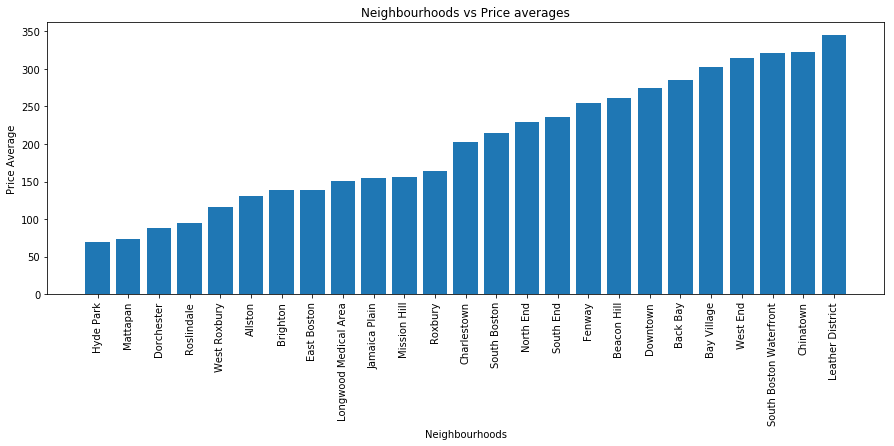

In [45]:
visualize.Plot_bar(neigbourhood_names, neighbourhood_values, 'Neighbourhoods','Price Average','Neighbourhoods vs Price averages',Rotation = 90)

**2- Does the price fluctuates based on the month/ season of the year ? **

In [46]:
# Firstly create a season column 
boston_dataset['season'] = boston_dataset.month.apply(lambda x : helper.season(x))

In [47]:
season_price_avg = boston_dataset.groupby (['season']).price.mean().sort_values()
season_price_avg



season
Winter    185.526118
Spring    190.750467
Summer    200.851331
Autumn    221.338727
Name: price, dtype: float64

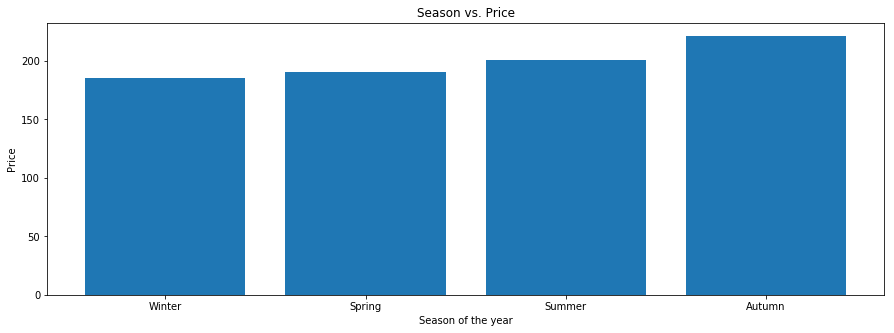

In [48]:
# Create names and values list 
season_names = list(season_price_avg.index)
season_values = list (season_price_avg.values)
visualize.Plot_bar (season_names, season_values, 'Season of the year', 'Price', 'Season vs. Price', Rotation = None)

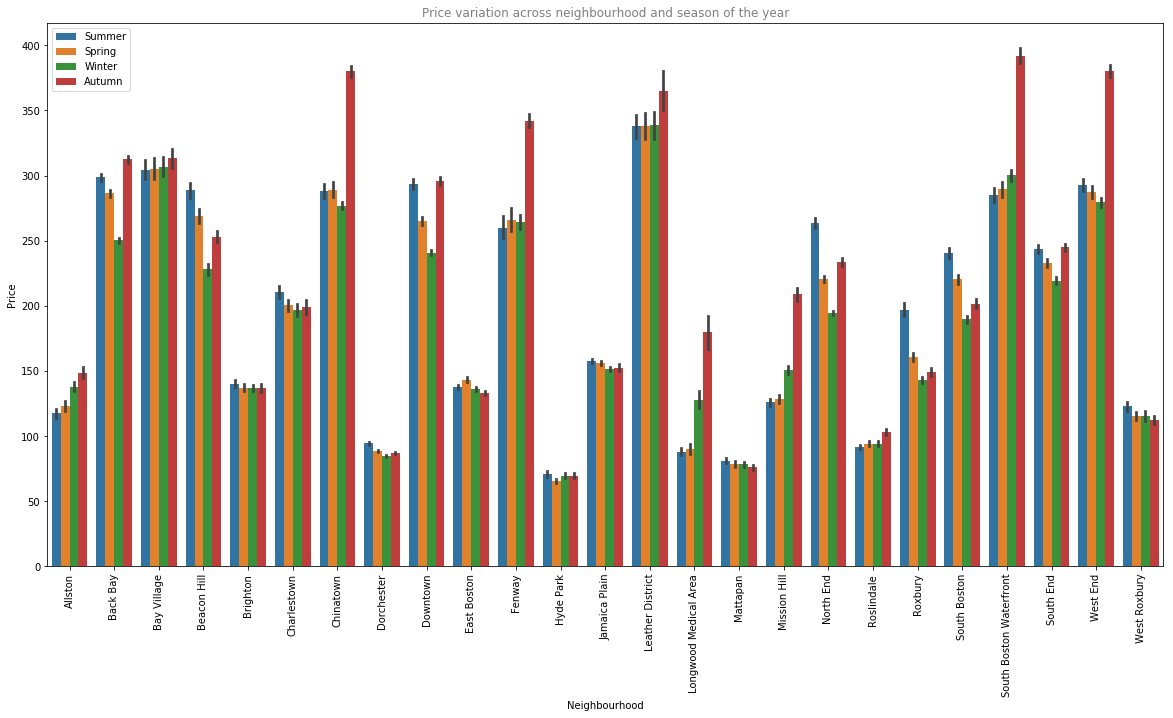

In [65]:
plt.figure(figsize = [20, 10])

ax = sns.barplot(x='neighbourhood_cleansed', y = 'price', hue='season', data=boston_dataset)
plt.title('Price variation across neighbourhood and season of the year', alpha = 0.5)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation = 90)
leg = ax.legend()

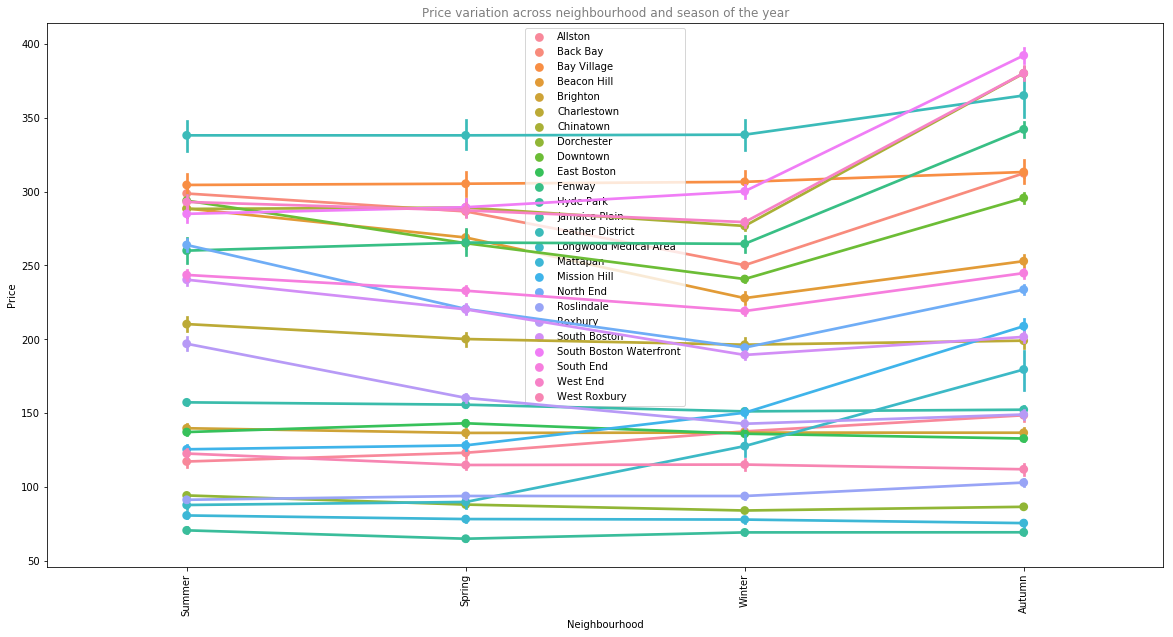

In [67]:
plt.figure(figsize = [20, 10])

ax = sns.pointplot(x= 'season' , y = 'price', hue='neighbourhood_cleansed', data=boston_dataset)
plt.title('Price variation across neighbourhood and season of the year', alpha = 0.5)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation = 90)
leg = ax.legend()

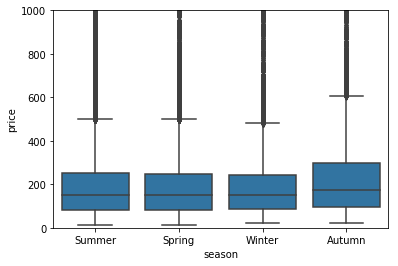

In [59]:
# A more close look to the numbers
default_color  = sns.color_palette()[0]
sns.boxplot(x= 'season', y= 'price',
                 data=boston_dataset, color = default_color);
plt.ylim([0, 1000]);

In [50]:
month_price_avg = boston_dataset.groupby (['month']).price.mean()
month_price_avg

month
1     182.799671
2     180.961028
3     181.818742
4     197.252890
5     193.712295
6     196.535302
7     202.486309
8     203.330142
9     237.047727
10    233.416248
11    202.924416
12    192.601915
Name: price, dtype: float64

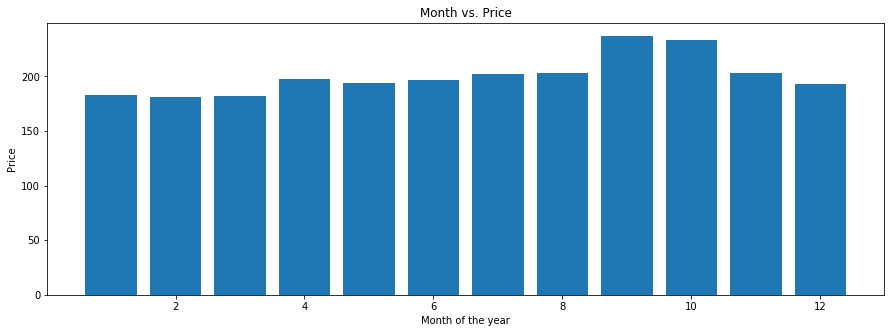

In [51]:
# Create names and values list 
months_names = list(month_price_avg.index)
months_values = list (month_price_avg.values)
visualize.Plot_bar (months_names, months_values, 'Month of the year', 'Price', 'Month vs. Price', Rotation = None)

In [52]:
weekday_price_avg = boston_dataset.groupby (['weekday']).price.mean().sort_values()
weekday_price_avg

weekday
Tuesday      195.173842
Wednesday    195.418228
Monday       195.809561
Thursday     198.073112
Sunday       198.219764
Friday       203.121167
Saturday     203.408387
Name: price, dtype: float64

**Do hosts with various/single listings tend to stabilize prices or change them frequently ?**

In [53]:
host_std = int(listing_no_missing.host_total_listings_count.std())
host_max = int(listing_no_missing.host_total_listings_count.max())
host_min = int(listing_no_missing.host_total_listings_count.min())
np.arange(host_min, host_max, host_std)

array([  0, 180, 360, 540, 720])

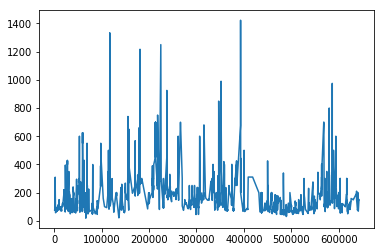

In [71]:
plt.plot(boston_dataset[boston_dataset.host_total_listings_count == 2].price)

**What impact do the host attributes (superhost, acceptance rate, ..., etc) have on the price ?**

In [54]:
host_corrs = listing_no_missing[['price',  'years_as_host', 'host_is_superhost', 'host_total_listings_count']].corr()

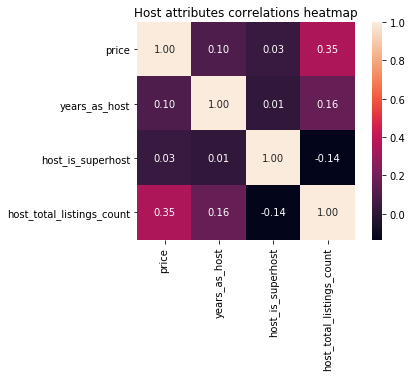

In [55]:
sns.heatmap(host_corrs, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Host attributes correlations heatmap');

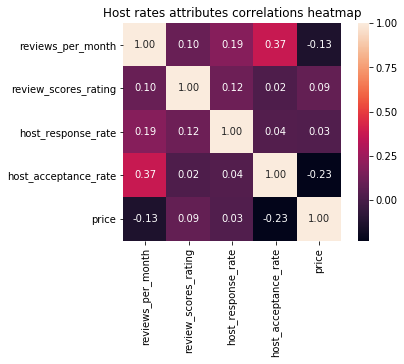

In [56]:
host_rates_corrs = boston_dataset[['reviews_per_month','review_scores_rating','host_response_rate','host_acceptance_rate','price']].corr()
sns.heatmap(host_rates_corrs, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Host rates attributes correlations heatmap');

**What is the relationship between the property attributes and the price ?**

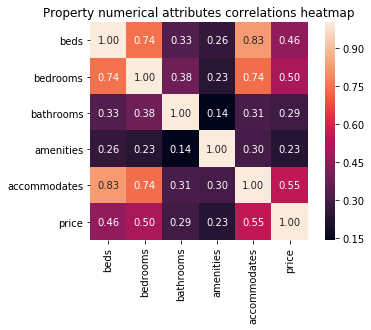

In [57]:
property_corrs = listing_no_missing[[ 'beds', 'bedrooms', 'bathrooms', 'amenities','accommodates','price']].corr()
sns.heatmap(property_corrs, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Property numerical attributes correlations heatmap');